In [95]:
# imports

import numpy as np
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [96]:
from machine_learning.dataset.dataset_2000 import dataset

In [97]:
print(len(dataset))

1421


In [98]:
def separates(sep_point):
    if sep_point == 1.0:
        return 0
    else:
        return 1

In [99]:
clean_X = np.array(list(map(lambda x: [x[1], x[2]], dataset)))

In [100]:
clean_y = np.array(list(map(lambda x: x[6], dataset)))

In [128]:
train_X, test_X, train_y, test_y = train_test_split(clean_X, clean_y, test_size=0.20, random_state=42)

In [129]:
train_X_0, train_X_1, train_y_0, train_y_1 = train_test_split(train_X, train_y, test_size = 0.005)

In [130]:
train_y_sep = np.array(list(map(separates, train_y_0)))
test_y_sep = np.array(list(map(separates, test_y)))

In [131]:
train_y_sep

array([1, 1, 1, ..., 1, 1, 1])

In [132]:
# Quick baseline

xgb_model = xgb.XGBRegressor(n_estimators=1000, max_depth=28, eta=0.01, subsample=1, colsample_bytree=1)
xgb_classify_model = xgb.XGBClassifier(n_estimators=8000, max_depth=18, eta=0.1, subsample=1, colsample_bytree=1)


In [133]:
train_y_sep

array([1, 1, 1, ..., 1, 1, 1])

In [134]:
xgb_model.fit(train_X_0, train_y_0)
xgb_classify_model.fit(train_X_0, train_y_sep)

[16:59:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBClassifier(eta=0.1, max_depth=18, n_estimators=8000)

In [135]:
def loss(y, yhat):
    return np.sqrt(np.mean((y-yhat)**2))

In [136]:
y_hat = xgb_model.predict(test_X)
y_hat_sep = xgb_classify_model.predict(test_X)

In [137]:
y_hat_sep

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [138]:
loss(y_hat, test_y)

0.03195564117952808

In [139]:
loss(y_hat_sep, test_y_sep)

0.13245323570650439

In [140]:
test_y_sep

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [141]:
y_hat_sep

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [46]:
# Let's give it an extra boost



In [47]:
feat_1 = list(map(lambda x: x[0], train_X_0 ))
feat_2 = list(map(lambda x: x[1], train_X_0 ))
color = train_y_sep

In [48]:
def get_color(y):
    if y>0.98:
        return 0.0
    else:
        return y

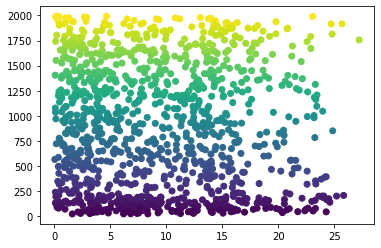

In [49]:
plt.scatter(feat_1, feat_2, c=feat_2)

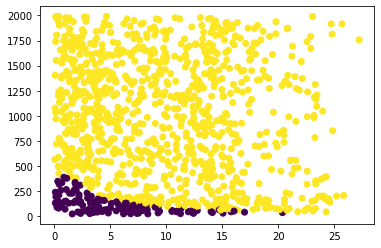

In [50]:
plt.scatter(feat_1, feat_2, c=color)

In [73]:
############### Let's build a Neural Network model next

In [74]:
train_X[3]

array([   2.60867208, 1007.37207364])

In [75]:
aoa_mean = np.mean(list(map(lambda x: x[0], train_X_0)))
re_mean = np.mean(list(map(lambda x: x[1], train_X_0)))
aoa_std = np.std(list(map(lambda x: x[0], train_X_0)))
re_std = np.std(list(map(lambda x: x[1], train_X_0)))

In [76]:
def scale(arr, mean, std):
    return (arr - mean) / std
    
def unscale(arr, mean, std):
    return (arr * std) + mean

In [77]:
normalized_aoa = scale(list(map(lambda x: x[0], train_X_0)), aoa_mean, aoa_std)

In [78]:
np.std(normalized_aoa)

1.0

In [79]:
np.std(unscale(normalized_aoa, aoa_mean, aoa_std))

6.374204852245914

In [80]:
normalized_re = scale(list(map(lambda x: x[1], train_X_0)), re_mean, re_std)

In [81]:
normalized_train_X_0 = np.array(list(zip(normalized_aoa, normalized_re)))

In [82]:
def normalize_input_data(data, aoa_mean=None, aoa_std=None, re_mean=None, re_std=None):
    if aoa_mean == None:
        aoa_mean = np.mean(list(map(lambda x: x[0], data)))
    if re_mean == None:
        re_mean = np.mean(list(map(lambda x: x[1], data)))
    if aoa_std == None:
        aoa_std = np.std(list(map(lambda x: x[0], data)))
    if re_std == None:
        re_std = np.std(list(map(lambda x: x[1], data)))
    normalized_aoa = scale(list(map(lambda x: x[0], data)), aoa_mean, aoa_std)
    normalized_re = scale(list(map(lambda x: x[1], data)), re_mean, re_std)
    return np.array(list(zip(normalized_aoa, normalized_re)))

In [83]:
normalized_train_X_0 = normalize_input_data(train_X_0)
normalized_test_X = normalize_input_data(test_X, aoa_mean, aoa_std, re_mean, re_std)

In [90]:
from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

import keras
from keras import Sequential
from keras.layers import Dense
from keras.layers import Dropout
nn_regression_model = Sequential()
nn_regression_model.add(Dense(2, input_dim=2))
#nn_regression_model.add(Dense(10, activation='elu'))
#nn_regression_model.add(Dropout(0.05))
nn_regression_model.add(Dense(6, activation='elu'))
#nn_regression_model.add(Dropout(0.05))
nn_regression_model.add(Dense(10, activation='elu'))
#nn_regression_model.add(Dropout(0.05))
#nn_regression_model.add(Dense(6, activation='relu'))
#nn_regression_model.add(Dropout(0.05))
nn_regression_model.add(Dense(4, activation='elu'))
#nn_regression_model.add(Dropout(0.05))
#nn_regression_model.add(Dense(3, activation='elu'))
#nn_regression_model.add(Dropout(0.05))
nn_regression_model.add(Dense(3, activation='elu'))
#nn_regression_model.add(Dropout(0.05))
nn_regression_model.add(Dense(2, activation='elu'))
nn_regression_model.add(Dense(1))

In [91]:
optimizer = keras.optimizers.Adam(lr=0.005)
nn_regression_model.compile(optimizer=optimizer, loss=root_mean_squared_error)

In [92]:
history = nn_regression_model.fit(normalized_train_X_0, train_y_0, epochs=800, batch_size=16, validation_data=(normalized_test_X, test_y))

Train on 1130 samples, validate on 285 samples
Epoch 1/800
1130/1130 [==============================] - 1s 469us/step - loss: 0.1919 - val_loss: 0.1062
Epoch 2/800
1130/1130 [==============================] - 0s 130us/step - loss: 0.0906 - val_loss: 0.0906
Epoch 3/800
1130/1130 [==============================] - 0s 127us/step - loss: 0.0755 - val_loss: 0.0627
Epoch 4/800
1130/1130 [==============================] - 0s 118us/step - loss: 0.0634 - val_loss: 0.0623
Epoch 5/800
1130/1130 [==============================] - 0s 126us/step - loss: 0.0604 - val_loss: 0.0545
Epoch 6/800
1130/1130 [==============================] - 0s 116us/step - loss: 0.0527 - val_loss: 0.0550
Epoch 7/800
1130/1130 [==============================] - 0s 123us/step - loss: 0.0530 - val_loss: 0.0523
Epoch 8/800
1130/1130 [==============================] - 0s 120us/step - loss: 0.0495 - val_loss: 0.0595
Epoch 9/800
1130/1130 [==============================] - 0s 118us/step - loss: 0.0497 - val_loss: 0.0592
Epoch 10

Epoch 78/800
1130/1130 [==============================] - 0s 114us/step - loss: 0.0212 - val_loss: 0.0240
Epoch 79/800
1130/1130 [==============================] - 0s 109us/step - loss: 0.0238 - val_loss: 0.0282
Epoch 80/800
1130/1130 [==============================] - 0s 117us/step - loss: 0.0250 - val_loss: 0.0362
Epoch 81/800
1130/1130 [==============================] - 0s 125us/step - loss: 0.0271 - val_loss: 0.0389
Epoch 82/800
1130/1130 [==============================] - 0s 118us/step - loss: 0.0255 - val_loss: 0.0260
Epoch 83/800
1130/1130 [==============================] - 0s 111us/step - loss: 0.0241 - val_loss: 0.0509
Epoch 84/800
1130/1130 [==============================] - 0s 117us/step - loss: 0.0287 - val_loss: 0.0269
Epoch 85/800
1130/1130 [==============================] - 0s 120us/step - loss: 0.0229 - val_loss: 0.0272
Epoch 86/800
1130/1130 [==============================] - 0s 119us/step - loss: 0.0225 - val_loss: 0.0230
Epoch 87/800
1130/1130 [======================

Epoch 155/800
1130/1130 [==============================] - 0s 108us/step - loss: 0.0191 - val_loss: 0.0229
Epoch 156/800
1130/1130 [==============================] - 0s 122us/step - loss: 0.0164 - val_loss: 0.0209
Epoch 157/800
1130/1130 [==============================] - 0s 113us/step - loss: 0.0179 - val_loss: 0.0234
Epoch 158/800
1130/1130 [==============================] - 0s 114us/step - loss: 0.0228 - val_loss: 0.0271
Epoch 159/800
1130/1130 [==============================] - 0s 124us/step - loss: 0.0160 - val_loss: 0.0235
Epoch 160/800
1130/1130 [==============================] - 0s 127us/step - loss: 0.0176 - val_loss: 0.0296
Epoch 161/800
1130/1130 [==============================] - 0s 121us/step - loss: 0.0216 - val_loss: 0.0257
Epoch 162/800
1130/1130 [==============================] - 0s 128us/step - loss: 0.0206 - val_loss: 0.0287
Epoch 163/800
1130/1130 [==============================] - 0s 118us/step - loss: 0.0184 - val_loss: 0.0244
Epoch 164/800
1130/1130 [============

1130/1130 [==============================] - 0s 111us/step - loss: 0.0185 - val_loss: 0.0251
Epoch 232/800
1130/1130 [==============================] - 0s 128us/step - loss: 0.0190 - val_loss: 0.0210
Epoch 233/800
1130/1130 [==============================] - 0s 119us/step - loss: 0.0157 - val_loss: 0.0209
Epoch 234/800
1130/1130 [==============================] - 0s 116us/step - loss: 0.0168 - val_loss: 0.0223
Epoch 235/800
1130/1130 [==============================] - 0s 122us/step - loss: 0.0151 - val_loss: 0.0215
Epoch 236/800
1130/1130 [==============================] - 0s 123us/step - loss: 0.0212 - val_loss: 0.0286
Epoch 237/800
1130/1130 [==============================] - 0s 117us/step - loss: 0.0208 - val_loss: 0.0211
Epoch 238/800
1130/1130 [==============================] - 0s 120us/step - loss: 0.0155 - val_loss: 0.0289
Epoch 239/800
1130/1130 [==============================] - 0s 117us/step - loss: 0.0187 - val_loss: 0.0216
Epoch 240/800
1130/1130 [==========================

1130/1130 [==============================] - 0s 122us/step - loss: 0.0153 - val_loss: 0.0196
Epoch 308/800
1130/1130 [==============================] - 0s 127us/step - loss: 0.0159 - val_loss: 0.0274
Epoch 309/800
1130/1130 [==============================] - 0s 120us/step - loss: 0.0209 - val_loss: 0.0421
Epoch 310/800
1130/1130 [==============================] - 0s 119us/step - loss: 0.0205 - val_loss: 0.0279
Epoch 311/800
1130/1130 [==============================] - 0s 122us/step - loss: 0.0168 - val_loss: 0.0250
Epoch 312/800
1130/1130 [==============================] - 0s 114us/step - loss: 0.0178 - val_loss: 0.0237
Epoch 313/800
1130/1130 [==============================] - 0s 120us/step - loss: 0.0203 - val_loss: 0.0237
Epoch 314/800
1130/1130 [==============================] - 0s 122us/step - loss: 0.0235 - val_loss: 0.0310
Epoch 315/800
1130/1130 [==============================] - 0s 122us/step - loss: 0.0177 - val_loss: 0.0244
Epoch 316/800
1130/1130 [==========================

1130/1130 [==============================] - 0s 118us/step - loss: 0.0166 - val_loss: 0.0225
Epoch 384/800
1130/1130 [==============================] - 0s 128us/step - loss: 0.0159 - val_loss: 0.0213
Epoch 385/800
1130/1130 [==============================] - 0s 119us/step - loss: 0.0162 - val_loss: 0.0229
Epoch 386/800
1130/1130 [==============================] - 0s 126us/step - loss: 0.0142 - val_loss: 0.0210
Epoch 387/800
1130/1130 [==============================] - 0s 128us/step - loss: 0.0172 - val_loss: 0.0268
Epoch 388/800
1130/1130 [==============================] - 0s 121us/step - loss: 0.0187 - val_loss: 0.0222
Epoch 389/800
1130/1130 [==============================] - 0s 120us/step - loss: 0.0154 - val_loss: 0.0275
Epoch 390/800
1130/1130 [==============================] - 0s 119us/step - loss: 0.0205 - val_loss: 0.0292
Epoch 391/800
1130/1130 [==============================] - 0s 117us/step - loss: 0.0173 - val_loss: 0.0233
Epoch 392/800
1130/1130 [==========================

1130/1130 [==============================] - 0s 125us/step - loss: 0.0172 - val_loss: 0.0222
Epoch 460/800
1130/1130 [==============================] - 0s 133us/step - loss: 0.0175 - val_loss: 0.0233
Epoch 461/800
1130/1130 [==============================] - 0s 120us/step - loss: 0.0162 - val_loss: 0.0202
Epoch 462/800
1130/1130 [==============================] - 0s 123us/step - loss: 0.0147 - val_loss: 0.0228
Epoch 463/800
1130/1130 [==============================] - 0s 124us/step - loss: 0.0183 - val_loss: 0.0245
Epoch 464/800
1130/1130 [==============================] - 0s 128us/step - loss: 0.0153 - val_loss: 0.0206
Epoch 465/800
1130/1130 [==============================] - 0s 111us/step - loss: 0.0159 - val_loss: 0.0247
Epoch 466/800
1130/1130 [==============================] - 0s 126us/step - loss: 0.0197 - val_loss: 0.0270
Epoch 467/800
1130/1130 [==============================] - 0s 118us/step - loss: 0.0159 - val_loss: 0.0238
Epoch 468/800
1130/1130 [==========================

1130/1130 [==============================] - 0s 129us/step - loss: 0.0160 - val_loss: 0.0239
Epoch 536/800
1130/1130 [==============================] - 0s 126us/step - loss: 0.0174 - val_loss: 0.0219
Epoch 537/800
1130/1130 [==============================] - 0s 127us/step - loss: 0.0154 - val_loss: 0.0229
Epoch 538/800
1130/1130 [==============================] - 0s 132us/step - loss: 0.0164 - val_loss: 0.0210
Epoch 539/800
1130/1130 [==============================] - 0s 121us/step - loss: 0.0155 - val_loss: 0.0281
Epoch 540/800
1130/1130 [==============================] - 0s 119us/step - loss: 0.0193 - val_loss: 0.0233
Epoch 541/800
1130/1130 [==============================] - 0s 127us/step - loss: 0.0177 - val_loss: 0.0291
Epoch 542/800
1130/1130 [==============================] - 0s 119us/step - loss: 0.0175 - val_loss: 0.0214
Epoch 543/800
1130/1130 [==============================] - 0s 129us/step - loss: 0.0171 - val_loss: 0.0209
Epoch 544/800
1130/1130 [==========================

1130/1130 [==============================] - 0s 129us/step - loss: 0.0185 - val_loss: 0.0224
Epoch 612/800
1130/1130 [==============================] - 0s 123us/step - loss: 0.0149 - val_loss: 0.0215
Epoch 613/800
1130/1130 [==============================] - 0s 131us/step - loss: 0.0160 - val_loss: 0.0279
Epoch 614/800
1130/1130 [==============================] - 0s 120us/step - loss: 0.0156 - val_loss: 0.0236
Epoch 615/800
1130/1130 [==============================] - 0s 122us/step - loss: 0.0185 - val_loss: 0.0241
Epoch 616/800
1130/1130 [==============================] - 0s 124us/step - loss: 0.0196 - val_loss: 0.0218
Epoch 617/800
1130/1130 [==============================] - 0s 122us/step - loss: 0.0138 - val_loss: 0.0195
Epoch 618/800
1130/1130 [==============================] - 0s 121us/step - loss: 0.0171 - val_loss: 0.0250
Epoch 619/800
1130/1130 [==============================] - 0s 120us/step - loss: 0.0144 - val_loss: 0.0238
Epoch 620/800
1130/1130 [==========================

1130/1130 [==============================] - 0s 124us/step - loss: 0.0138 - val_loss: 0.0228
Epoch 688/800
1130/1130 [==============================] - 0s 122us/step - loss: 0.0126 - val_loss: 0.0257
Epoch 689/800
1130/1130 [==============================] - 0s 119us/step - loss: 0.0170 - val_loss: 0.0217
Epoch 690/800
1130/1130 [==============================] - 0s 122us/step - loss: 0.0186 - val_loss: 0.0221
Epoch 691/800
1130/1130 [==============================] - 0s 120us/step - loss: 0.0177 - val_loss: 0.0245
Epoch 692/800
1130/1130 [==============================] - 0s 121us/step - loss: 0.0156 - val_loss: 0.0237
Epoch 693/800
1130/1130 [==============================] - 0s 114us/step - loss: 0.0166 - val_loss: 0.0272
Epoch 694/800
1130/1130 [==============================] - 0s 120us/step - loss: 0.0155 - val_loss: 0.0239
Epoch 695/800
1130/1130 [==============================] - 0s 118us/step - loss: 0.0172 - val_loss: 0.0254
Epoch 696/800
1130/1130 [==========================

1130/1130 [==============================] - 0s 123us/step - loss: 0.0159 - val_loss: 0.0245
Epoch 764/800
1130/1130 [==============================] - 0s 125us/step - loss: 0.0152 - val_loss: 0.0201
Epoch 765/800
1130/1130 [==============================] - 0s 123us/step - loss: 0.0173 - val_loss: 0.0234
Epoch 766/800
1130/1130 [==============================] - 0s 116us/step - loss: 0.0150 - val_loss: 0.0269
Epoch 767/800
1130/1130 [==============================] - 0s 124us/step - loss: 0.0164 - val_loss: 0.0239
Epoch 768/800
1130/1130 [==============================] - 0s 114us/step - loss: 0.0162 - val_loss: 0.0210
Epoch 769/800
1130/1130 [==============================] - 0s 123us/step - loss: 0.0229 - val_loss: 0.0452
Epoch 770/800
1130/1130 [==============================] - 0s 119us/step - loss: 0.0208 - val_loss: 0.0194
Epoch 771/800
1130/1130 [==============================] - 0s 116us/step - loss: 0.0200 - val_loss: 0.0234
Epoch 772/800
1130/1130 [==========================

In [93]:
history.history

{'val_loss': [0.10622133108084662,
  0.09062465379635493,
  0.06265811260070717,
  0.06229035147188003,
  0.054510724087033356,
  0.05501524488392629,
  0.052259698209532524,
  0.05949110668479351,
  0.0592380641060963,
  0.044936097896935645,
  0.04999850678600763,
  0.05135368409386852,
  0.04468743297875973,
  0.04024463328614569,
  0.041847157328013786,
  0.03905309825612788,
  0.054205188547310074,
  0.041982929356265485,
  0.04596145503353654,
  0.036277950097594346,
  0.03582049448108464,
  0.04236626217239781,
  0.04178382733411956,
  0.03537466554788121,
  0.03886764383499037,
  0.03236063706378142,
  0.040865756087658696,
  0.034894267404288574,
  0.036171935720924746,
  0.03178274185118968,
  0.038148254339109386,
  0.0509056379659134,
  0.03408757282192247,
  0.03553030283043259,
  0.03586465133386746,
  0.03663149950535674,
  0.043566554105072694,
  0.030063768463176592,
  0.041847222834302665,
  0.034110102554162344,
  0.030236452523815006,
  0.0307867764903788,
  0.02986

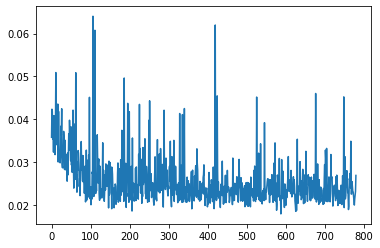

In [94]:
#plt.plot(history.history['loss'][20:])
plt.plot(history.history['val_loss'][20:])

In [ ]:
test_y.reshape(-1, 1)

In [60]:
test_y = test_y.reshape(-1, 1)

In [511]:
test_y.shape

(153, 1)

In [512]:
normalized_test_X.shape

(153, 2)

In [456]:
nn_regression_model.evaluate(normalized_test_X, test_y.reshape(-1,1))

153/153 [==============================] - 0s 281us/step


0.06630284509627647

In [461]:
nn_y_hat = nn_regression_model.predict(normalized_test_X)

In [463]:
loss(nn_y_hat, test_y)

0.06727551494522278

In [457]:
nn_y_hat

array([[0.9181886 ],
       [0.4889084 ],
       [0.40293854],
       [0.34933594],
       [0.34616268],
       [0.54218036],
       [0.5707635 ],
       [0.3497627 ],
       [0.5455651 ],
       [0.55160445],
       [0.45163423],
       [0.38549358],
       [0.34072512],
       [0.5282803 ],
       [0.9251765 ],
       [0.6669915 ],
       [0.5185026 ],
       [0.7306971 ],
       [0.3516066 ],
       [0.6372754 ],
       [0.5703931 ],
       [0.3572819 ],
       [0.45676988],
       [0.8949043 ],
       [0.5969509 ],
       [0.8557297 ],
       [0.87802076],
       [0.84403384],
       [0.3618564 ],
       [0.34706113],
       [0.76304454],
       [0.56673867],
       [0.9201263 ],
       [0.6461513 ],
       [0.33590412],
       [0.28490636],
       [0.6472716 ],
       [0.37886798],
       [0.35626847],
       [0.45383823],
       [0.9253788 ],
       [0.5280848 ],
       [0.5366023 ],
       [0.5522563 ],
       [0.37928438],
       [0.86925447],
       [0.5420133 ],
       [0.513

In [440]:
test_y

array([1.        , 0.54501689, 0.38713097, 0.23685368, 0.23304827,
       0.60410395, 0.615605  , 0.25297941, 0.59797714, 0.6343405 ,
       0.41472641, 0.33223349, 0.22611083, 0.52731679, 1.        ,
       0.74009685, 0.5640435 , 0.68522499, 0.27483291, 0.650858  ,
       0.63817012, 0.25722573, 0.45470381, 1.        , 0.5016529 ,
       1.        , 1.        , 0.84079054, 0.29393561, 0.2496301 ,
       0.5972936 , 0.60631116, 1.        , 0.71955657, 0.2550733 ,
       0.09032166, 0.72371185, 0.32371489, 0.28788385, 0.42753973,
       1.        , 0.57934162, 0.57250998, 0.57015607, 0.31692867,
       0.89726727, 0.52487198, 0.58132868, 1.        , 0.73579722,
       0.51440307, 0.48622842, 0.20234911, 0.64070695, 0.36813709,
       1.        , 0.84205488, 0.80628092, 0.75309539, 0.38045717,
       0.54387047, 0.35263237, 0.74612017, 0.5685466 , 0.29554906,
       0.89643737, 0.4036875 , 0.52956348, 0.60574341, 1.        ,
       1.        , 0.24933331, 0.35392972, 1.        , 0.64081

In [492]:
loss(nn_y_hat, test_y)

0.06727551494522278

In [52]:
###############  Finally, a K-Nearest Neighbor model

In [99]:
from sklearn import neighbors

n_neighbors = 2


knn_regression_model = neighbors.KNeighborsRegressor(n_neighbors)
knn_regression_model.fit(train_X, train_y)

KNeighborsRegressor(n_neighbors=2)

In [100]:
knn_y_hat = (knn_regression_model.predict(test_X)).reshape(-1, 1)

In [101]:
knn_y_hat.shape

(238, 1)

In [102]:
test_y = test_y.reshape(-1,1)

In [103]:
test_y.shape

(238, 1)

In [104]:
loss(knn_y_hat, test_y)

0.09291696394388589

In [206]:
# Now we combine the greater certainty of the classifier to fix regression 1's values

def boost_predictions(regression_preds, classification_preds):
    return ((regression_preds-1)*classification_preds)+1

In [209]:
y_hat_boosted = boost_predictions(y_hat, y_hat_sep)
nn_y_hat_boosted = boost_predictions(nn_y_hat, y_hat_sep)
knn_y_hat_boosted = boost_predictions(knn_y_hat, y_hat_sep)


In [208]:
loss(y_hat_boosted, test_y)

0.037152345517145136

In [210]:
loss(nn_y_hat_boosted, test_y)

0.2376277390736039

In [211]:
loss(knn_y_hat_boosted, test_y)

0.1811940116657541

In [212]:
percent_boost_improvement = (loss(y_hat, test_y)-loss(y_hat_boosted, test_y))/loss(y_hat, test_y)*100
print("Boost improvement: " + str(percent_boost_improvement) + " %")

Boost improvement: 12.051220657383295 %


In [262]:
######## Stacking

In [284]:
# input for the next level in the stack is original input data + predictions for the three models = 5-d vectors

len(train_X_1)
xgb_preds_1 = xgb_model.predict(train_X_1)
nn_preds_1 = np.array(list(map(lambda x: x[0], nn_regression_model.predict(train_X_1))))
knn_preds_1 = knn_regression_model.predict(train_X_1)
feats_1_1 = np.array(list(map(lambda x: x[0], train_X_1)))
feats_2_1 = np.array(list(map(lambda x: x[1], train_X_1)))
train_X_stack = np.array(list(zip(feats_1_1, feats_2_1, xgb_preds_1, nn_preds_1, knn_preds_1)))
train_y_stack = train_y_1

In [283]:
train_X_stack[2]

array([5.23978103e+00, 7.73287260e+02, 5.57805061e-01, 5.56716084e-01,
       5.52981116e-01])

In [285]:
train_y_1[2]

0.5592971078305247

In [287]:
stacked_model = xgb.XGBRegressor(n_estimators=1000, max_depth=12, eta=0.1, subsample=1, colsample_bytree=1)

In [288]:
stacked_model.fit(train_X_stack, train_y_stack)

[13:24:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(eta=0.1, max_depth=12, n_estimators=1000)

In [ ]:
# Test stack performance

In [290]:
xgb_test = xgb_model.predict(test_X)
nn_test = np.array(list(map(lambda x: x[0], nn_regression_model.predict(test_X))))
knn_test = knn_regression_model.predict(test_X)
feats_1_test = np.array(list(map(lambda x: x[0], test_X)))
feats_2_test = np.array(list(map(lambda x: x[1], test_X)))
test_X_stack = np.array(list(zip(feats_1_test, feats_2_test, xgb_test, nn_test, knn_test)))
test_y_stack = test_y

In [291]:
y_hat_stack = stacked_model.predict(test_X_stack)

In [292]:
loss(y_hat_stack, test_y)

0.03840394324141504

In [43]:
def predict_sep_points(aoa, re, mc, mcp, thick):
    x_in = pd.DataFrame(data=[[aoa, re, mc, mcp, thick]], columns=['aoa', 'Re', 'mc', 'mcp', 'th'])
    y_hat = model_u.predict(x_in)[0]
    separates = classify_model.predict(x_in)[0]
    return ((y_hat-1)*separates)+1

In [48]:
predict_sep_points(8, 6000000, 4.5, 60, 26)

0.00446850061416626

In [29]:
np.array([4, 3000, 10, 15, 30])

array([   4, 3000,   10,   15,   30])

In [31]:
a = np.array([np.array([4, 3000, 10, 15, 30])])

In [37]:
a = pd.DataFrame(data=[[4, 3000, 10, 15, 30]], columns=['aoa', 'Re', 'mc', 'mcp', 'th'])

In [38]:
model_u.predict(a)

array([0.22209579], dtype=float32)